# Measurement Error

This module compares measurements on billionaires from Bloomberg and Forbes at almost the same moment in time (May and April 2021).
From this, one can make inference about measurement error.

In [1]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tools
from thesis_tools.utils.data import *

## Data Preparation

In [2]:
df_forbes_2021 = read_billionaires_data(only_years=['2021'])
df_bloomberg_2021 = read_bloomberg_data()

In [3]:
df_merged = pd.merge(df_forbes_2021, df_bloomberg_2021, on='full_name', how='inner', suffixes=('_forbes', '_bloomberg'))
df_merged = df_merged[['full_name', 'net_worth_forbes', 'net_worth_bloomberg', 'log_net_worth_forbes', 'log_net_worth_bloomberg', 'country_of_citizenship', 'region_forbes', 'sub_region']]

In [4]:
df_merged['forbes_over_bloomberg'] = df_merged['net_worth_forbes'] / df_merged['net_worth_bloomberg']
df_merged['forbes_over_bloomberg_normalised'] = df_merged['forbes_over_bloomberg'] / df_merged['forbes_over_bloomberg'].mean()
df_merged['log_forbes_minus_log_bloomberg'] = df_merged['log_net_worth_forbes'] - df_merged['log_net_worth_bloomberg']
df_merged['log_forbes_minus_log_bloomberg_normalised'] = df_merged['log_forbes_minus_log_bloomberg'] - df_merged['log_forbes_minus_log_bloomberg'].mean()
df_merged['absolute_percentage_difference'] = np.abs(df_merged['forbes_over_bloomberg'] - 1) * 100
df_merged['absolute_log_difference'] = np.abs(df_merged['log_forbes_minus_log_bloomberg'])
df_merged['squared_log_difference'] = df_merged['log_forbes_minus_log_bloomberg'] ** 2

## Distribution

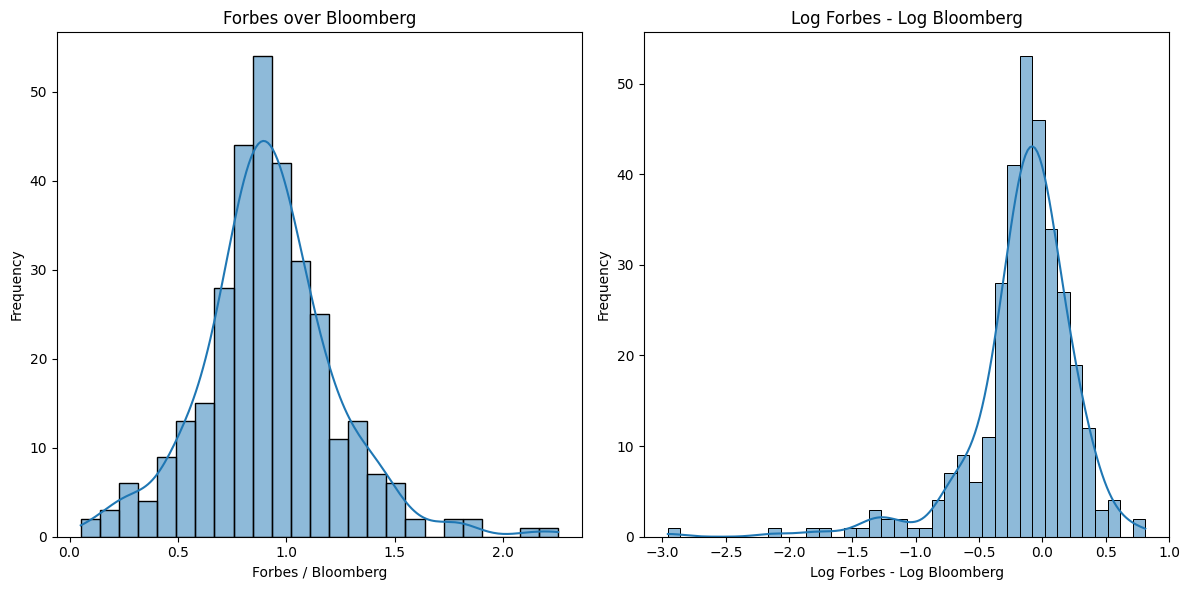

In [5]:
# Plot forbes_over_bloomberg and log_forbes_minus_log_bloomberg
# Fit a kde to the data in both cases
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df_merged['forbes_over_bloomberg'], kde=True, ax=ax[0])
ax[0].set_title('Forbes over Bloomberg')
ax[0].set_xlabel('Forbes / Bloomberg')
ax[0].set_ylabel('Frequency')
sns.histplot(df_merged['log_forbes_minus_log_bloomberg'], kde=True, ax=ax[1])
ax[1].set_title('Log Forbes - Log Bloomberg')
ax[1].set_xlabel('Log Forbes - Log Bloomberg')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

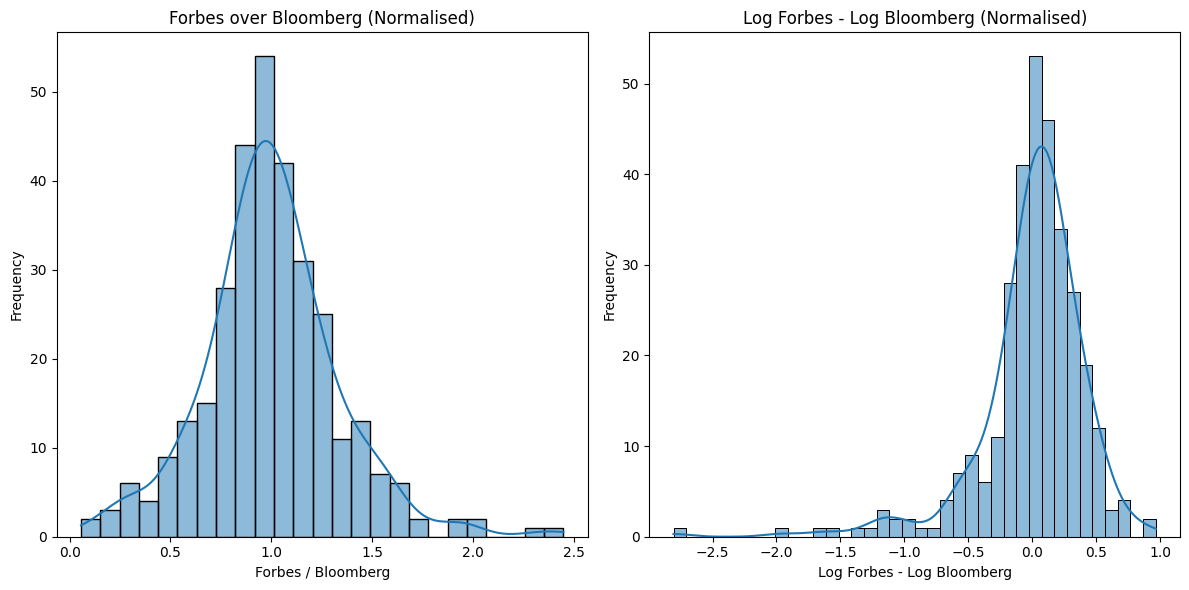

In [6]:
# Normalised forbes_over_bloomberg
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df_merged['forbes_over_bloomberg_normalised'], kde=True, ax=ax[0])
ax[0].set_title('Forbes over Bloomberg (Normalised)')
ax[0].set_xlabel('Forbes / Bloomberg')
ax[0].set_ylabel('Frequency')
sns.histplot(df_merged['log_forbes_minus_log_bloomberg_normalised'], kde=True, ax=ax[1])
ax[1].set_title('Log Forbes - Log Bloomberg (Normalised)')
ax[1].set_xlabel('Log Forbes - Log Bloomberg')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [7]:
# Find out what the outliers are
df_merged.sort_values('forbes_over_bloomberg', ascending=False, inplace=True)
# take the top and bottom 10% of the data
trimming = 0.10
n = int(trimming * len(df_merged))
df_outliers = pd.concat([df_merged.head(n), df_merged.tail(n)])
df_trimmed = df_merged.iloc[n:-n]

In [8]:
df_outliers

,full_name,net_worth_forbes,net_worth_bloomberg,log_net_worth_forbes,log_net_worth_bloomberg,country_of_citizenship,region_forbes,sub_region,forbes_over_bloomberg,forbes_over_bloomberg_normalised,log_forbes_minus_log_bloomberg,log_forbes_minus_log_bloomberg_normalised,absolute_percentage_difference,absolute_log_difference,squared_log_difference
51,Zhang Yong,23.0,10.20,3.135494,2.322388,Singapore,East Asia,Southeast Asia,2.254902,2.449638,0.813106,0.965794,125.490196,0.813106,0.661142
22,Wang Wei,39.0,18.30,3.663562,2.906901,China,China,China,2.131148,2.315196,0.756661,0.909348,113.114754,0.756661,0.572535
99,Finn Rausing,13.9,7.66,2.631889,2.036012,Sweden,Europe,Scandinavia,1.814621,1.971334,0.595877,0.748564,81.462141,0.595877,0.355069
101,Kirsten Rausing,13.9,7.66,2.631889,2.036012,Sweden,Europe,Scandinavia,1.814621,1.971334,0.595877,0.748564,81.462141,0.595877,0.355069
57,Pierre Omidyar,21.4,12.10,3.063391,2.493205,United States,North America,U.S.,1.768595,1.921333,0.570185,0.722873,76.859504,0.570185,0.325111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Vivien Chen,1.3,5.88,0.262364,1.771557,Hong Kong,China,China,0.221088,0.240182,-1.509192,-1.356505,77.891156,1.509192,2.277662
313,Thomas Kwok,2.2,12.10,0.788457,2.493205,Hong Kong,China,China,0.181818,0.197520,-1.704748,-1.552061,81.818182,1.704748,2.906166
320,Bom Kim,1.0,6.39,0.000000,1.854734,United States,North America,U.S.,0.156495,0.170010,-1.854734,-1.702047,84.350548,1.854734,3.440039
317,Raymond Kwok,1.5,12.60,0.405465,2.533697,Hong Kong,China,China,0.119048,0.129329,-2.128232,-1.975544,88.095238,2.128232,4.529370


A couple of explanations for some of the outliers:
* Overestimated by Forbes:
    * Zhang Yong: shares of Haidilao slid, but not by over 50%
    * Wang Wei: no clear explanation, shares just moved a bit
    * Finn & Kirsten Rausing: no clear explanation
    * Pierre Omidyar: no clear explanation, eBay shares did not move
* Underestimated by Forbes:
    * Henry Cheng: no explanation, maybe his daughter?
    * Raymond Kwok: no explanation
    * Bom Kim: no clear explanation
    * Thomas Kwok: see above
    * Vivien Chen: inherited, but not in 2021
    


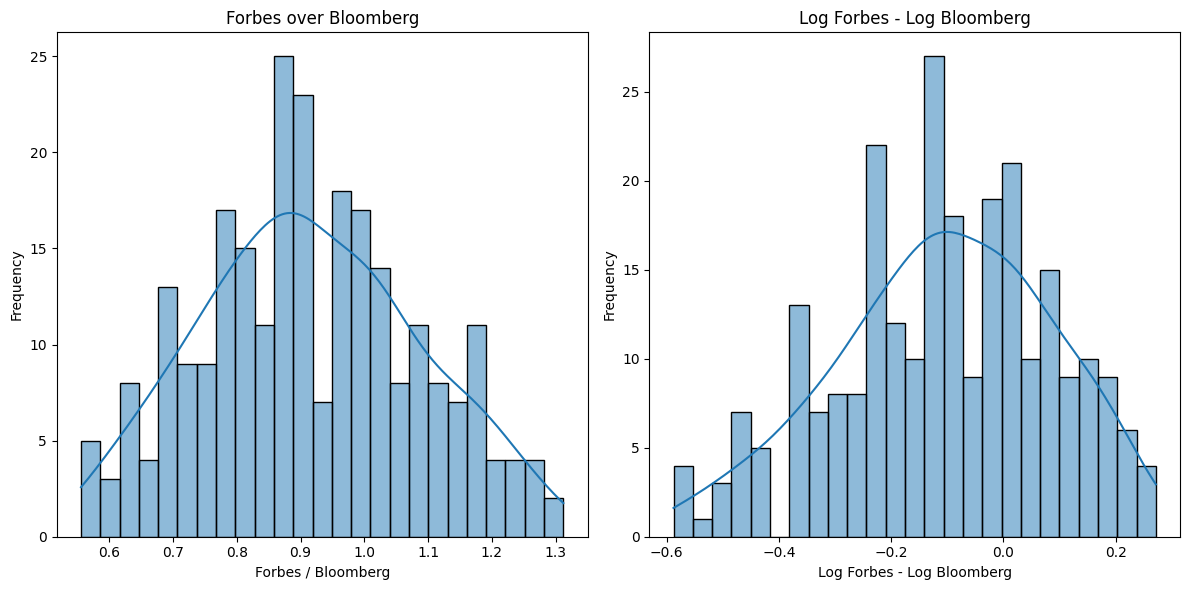

In [9]:
# Plot the trimmed data for both relative and log differences with kdes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
n_bins = 25
sns.histplot(df_trimmed['forbes_over_bloomberg'], kde=True, ax=ax[0], bins=n_bins)
ax[0].set_title('Forbes over Bloomberg')
ax[0].set_xlabel('Forbes / Bloomberg')
ax[0].set_ylabel('Frequency')
sns.histplot(df_trimmed['log_forbes_minus_log_bloomberg'], kde=True, ax=ax[1], bins=n_bins)
ax[1].set_title('Log Forbes - Log Bloomberg')
ax[1].set_xlabel('Log Forbes - Log Bloomberg')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Heteroskedasticity

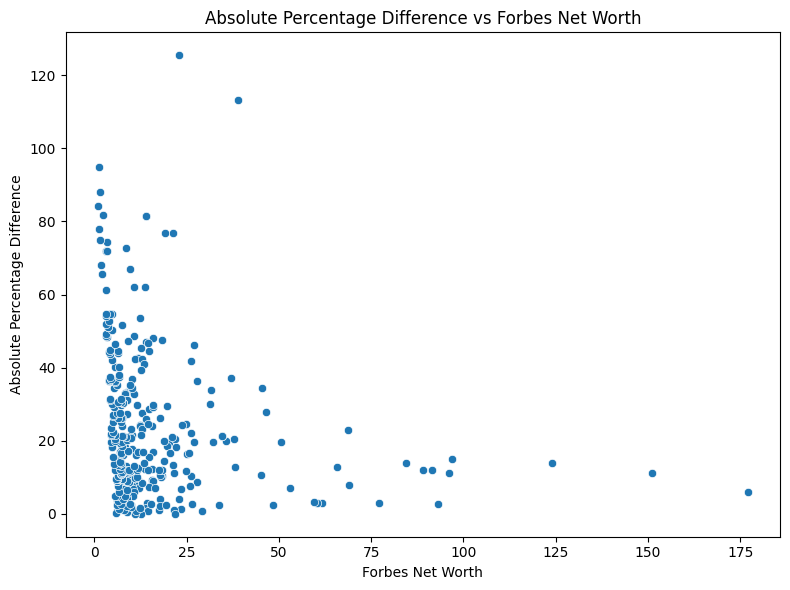

In [10]:
# Plot the absolute percentage difference against the forbes net worth
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x='net_worth_forbes', y='absolute_percentage_difference', data=df_merged, ax=ax)
ax.set_title('Absolute Percentage Difference vs Forbes Net Worth')
ax.set_xlabel('Forbes Net Worth')
ax.set_ylabel('Absolute Percentage Difference')
plt.tight_layout()
plt.show()

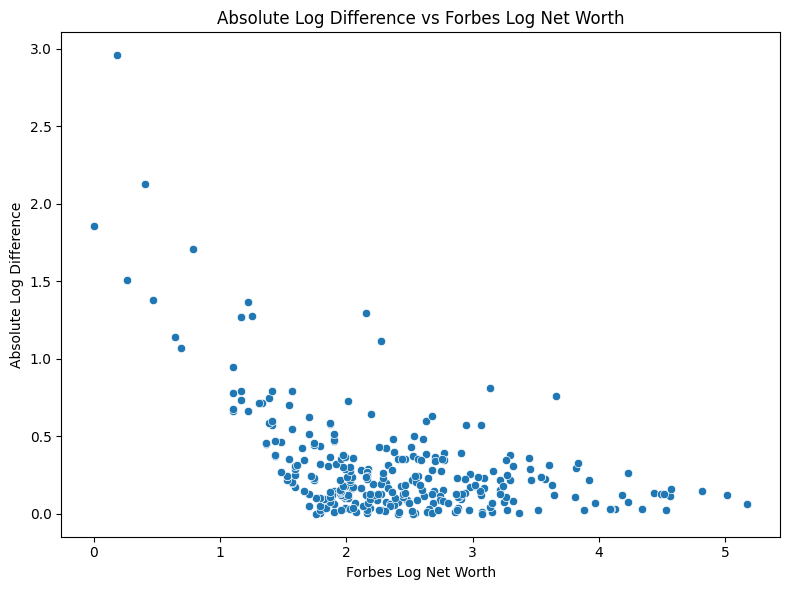

In [11]:
# Plot the absolute log difference against the forbes log net worth
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x='log_net_worth_forbes', y='absolute_log_difference', data=df_merged, ax=ax)
ax.set_title('Absolute Log Difference vs Forbes Log Net Worth')
ax.set_xlabel('Forbes Log Net Worth')
ax.set_ylabel('Absolute Log Difference')
plt.tight_layout()
plt.show()

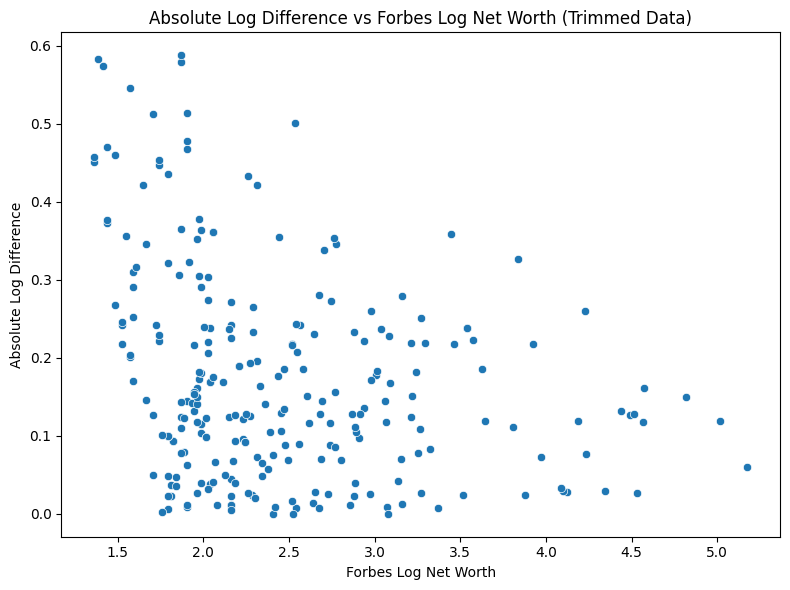

In [12]:
# Now plot the absolute log difference against the forbes net worth for the trimmed data
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x='log_net_worth_forbes', y='absolute_log_difference', data=df_trimmed, ax=ax)
ax.set_title('Absolute Log Difference vs Forbes Log Net Worth (Trimmed Data)')
ax.set_xlabel('Forbes Log Net Worth')
ax.set_ylabel('Absolute Log Difference')
plt.tight_layout()
plt.show()

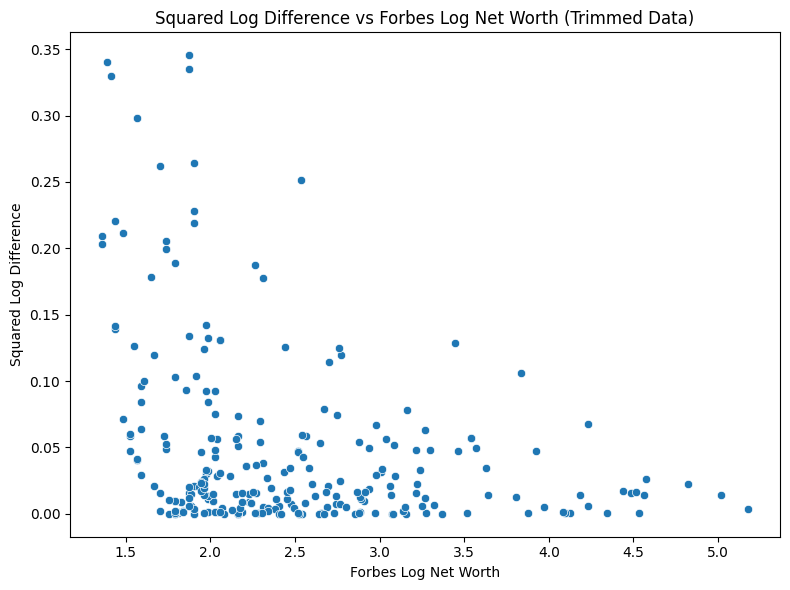

In [13]:
# Now plot the absolute log difference against the forbes net worth for the trimmed data
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x='log_net_worth_forbes', y='squared_log_difference', data=df_trimmed, ax=ax)
ax.set_title('Squared Log Difference vs Forbes Log Net Worth (Trimmed Data)')
ax.set_xlabel('Forbes Log Net Worth')
ax.set_ylabel('Squared Log Difference')
plt.tight_layout()
plt.show()

## Investigating how this relates to test significance

In [14]:
from thesis_tools.statistical_tests.tests import *

In [15]:
# Read the forbes data for all years
df = read_billionaires_data()
# group by sub_region and year
grouped = df.groupby(['sub_region', 'year'])

In [16]:
# show the U.S. in 2021
us_21 = grouped.get_group(('U.S.', '2021'))

Test Statistic: 0.781744212922679
P-value (lower-sided): 0.987
P-value (upper-sided): 0.013
P-value (two-sided): 0.026


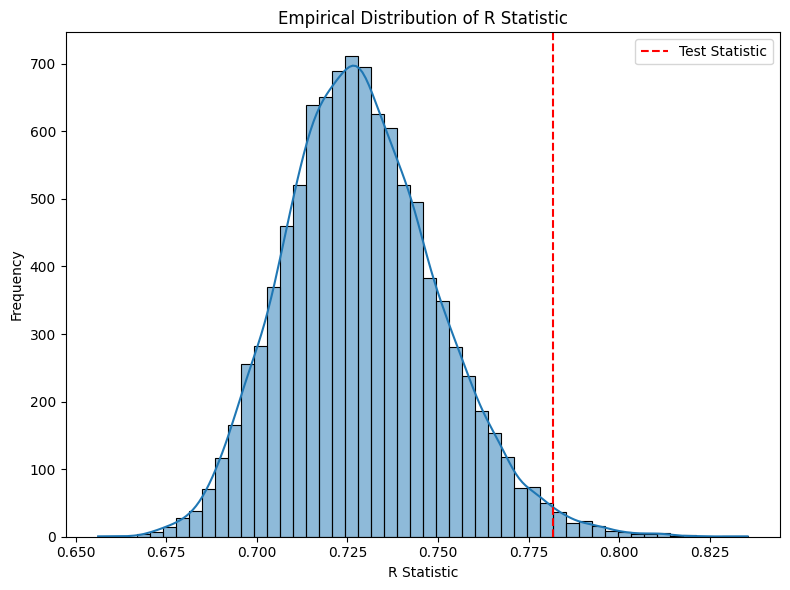

In [17]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Test Statistic: 0.548368509798097
P-value (lower-sided): 0.7405
P-value (upper-sided): 0.2595
P-value (two-sided): 0.519


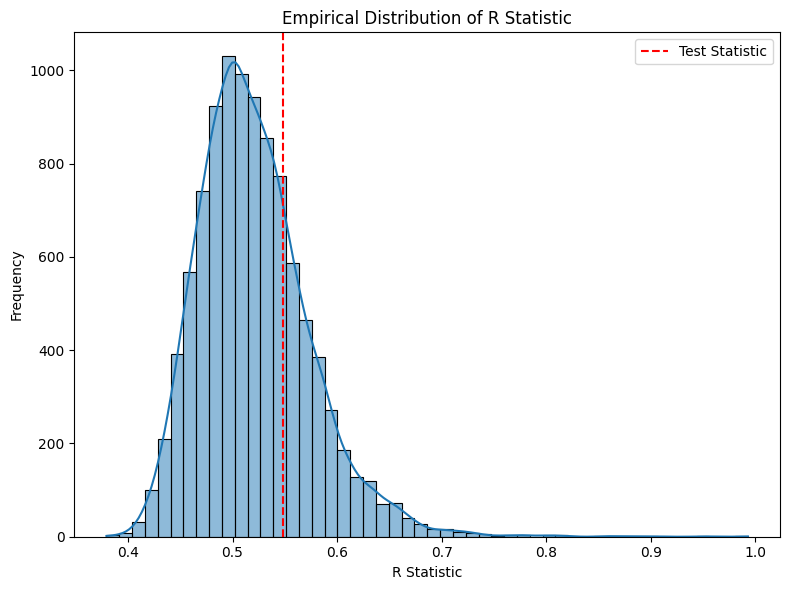

In [18]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=3,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Test Statistic: 0.781744212922679
P-value (lower-sided): 0.9959
P-value (upper-sided): 0.0041
P-value (two-sided): 0.0082


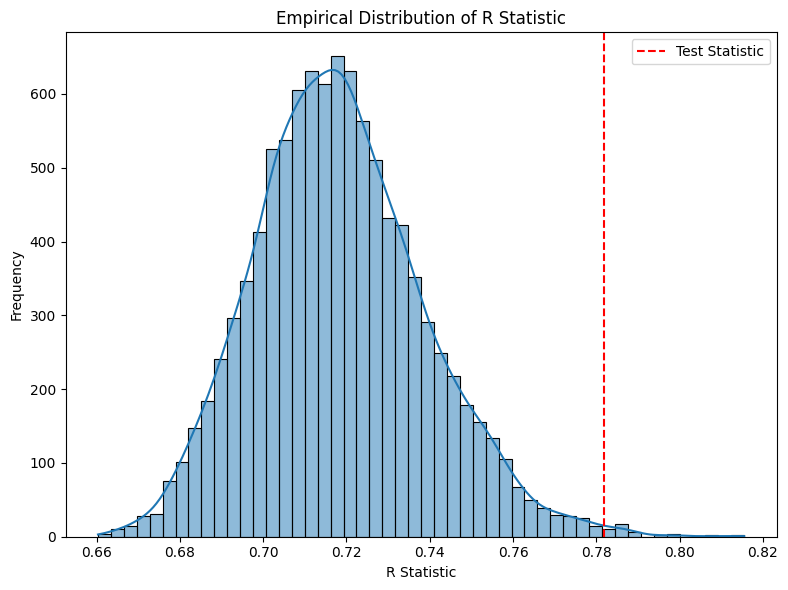

In [19]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Test Statistic: 0.548368509798097
P-value (lower-sided): 0.8219
P-value (upper-sided): 0.1781
P-value (two-sided): 0.3562


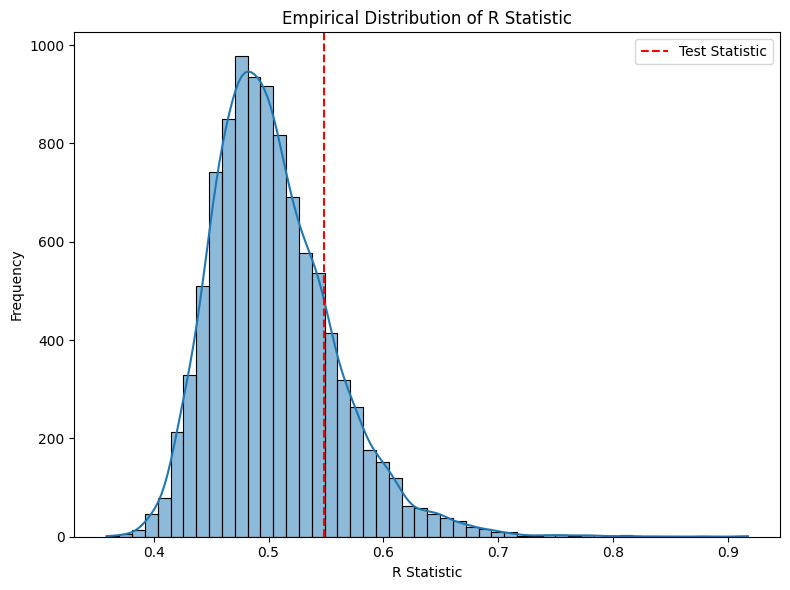

In [20]:
test_stat, p_val_lo, p_val_hi, p_val_2_sided, dist = R_stat_pareto_test(
    us_21['log_net_worth'],
    order=3,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised'
)
print('Test Statistic:', test_stat)
print('P-value (lower-sided):', p_val_lo)
print('P-value (upper-sided):', p_val_hi)
print('P-value (two-sided):', p_val_2_sided)

# Plot the empirical distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(dist, kde=True, ax=ax, bins=50)
ax.axvline(test_stat, color='red', linestyle='--', label='Test Statistic')
ax.legend()
ax.set_title('Empirical Distribution of R Statistic')
ax.set_xlabel('R Statistic')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
# show the U.S. in 2021
grouped.get_group(('Southeast Asia', '2019'))

,year,rank,net_worth,full_name,self_made,country_of_citizenship,region,sub_region,log_net_worth
19495,2019-01-01,75.0,15.2,Dhanin Chearavanont,False,Thailand,East Asia,Southeast Asia,2.721295
19507,2019-01-01,87.0,14.5,Charoen Sirivadhanabhakdi,True,Thailand,East Asia,Southeast Asia,2.674149
19524,2019-01-01,104.0,12.8,Robert Kuok,True,Malaysia,East Asia,Southeast Asia,2.549445
19532,2019-01-01,112.0,12.0,Robert & Philip Ng,False,Singapore,East Asia,Southeast Asia,2.484907
19571,2019-01-01,149.0,9.4,Quek Leng Chan,False,Malaysia,East Asia,Southeast Asia,2.240710
...,...,...,...,...,...,...,...,...,...
21297,2019-01-01,1818.0,1.2,Lim Wee Chai,True,Malaysia,East Asia,Southeast Asia,0.182322
21367,2019-01-01,1941.0,1.1,Anant Asavabhokin,True,Thailand,East Asia,Southeast Asia,0.095310
21458,2019-01-01,1941.0,1.1,Rit Thirakomen,False,Thailand,East Asia,Southeast Asia,0.095310
21517,2019-01-01,2057.0,1.0,Chatchai Kaewbootta,True,Thailand,East Asia,Southeast Asia,0.000000


In [22]:
# Do statistical tests for all sub_region / year combinations with more than 64 observations
all_sub_regions = df['sub_region'].unique()
all_sub_regions = all_sub_regions[all_sub_regions != 'Not a sub-region']
all_years = df['year'].unique()

In [23]:
test_results = {}
for sub_region in all_sub_regions:
    for year in all_years:
        print(f'Running test for {sub_region} in {year}')
        data = df[(df['sub_region'] == sub_region) & (df['year'] == year)]
        if len(data) < 64:
            continue
        
        # No rounding, no measurement error
        R_2_stat_nr_nm, R_2_p_val_lo_nr_nm, R_2_p_val_hi_nr_nm, R_2_p_val_2_sided_nr_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=None,
            measurement_error='None'
        )
        R_3_stat_nr_nm, R_3_p_val_lo_nr_nm, R_3_p_val_hi_nr_nm, R_3_p_val_2_sided_nr_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=None,
            measurement_error='None'
        )

        # Rounding, no measurement error
        R_2_stat_r_nm, R_2_p_val_lo_r_nm, R_2_p_val_hi_r_nm, R_2_p_val_2_sided_r_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='None'
        )
        R_3_stat_r_nm, R_3_p_val_lo_r_nm, R_3_p_val_hi_r_nm, R_3_p_val_2_sided_r_nm, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='None'
        )

        # Rounding, measurement error (full density)
        R_2_stat_r_m_fd, R_2_p_val_lo_r_m_fd, R_2_p_val_hi_r_m_fd, R_2_p_val_2_sided_r_m_fd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative'
        )
        R_3_stat_r_m_fd, R_3_p_val_lo_r_m_fd, R_3_p_val_hi_r_m_fd, R_3_p_val_2_sided_r_m_fd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative'
        )

        # Rounding, measurement error (trimmed density)
        R_2_stat_r_m_td, R_2_p_val_lo_r_m_td, R_2_p_val_hi_r_m_td, R_2_p_val_2_sided_r_m_td, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_trimmed'
        )
        R_3_stat_r_m_td, R_3_p_val_lo_r_m_td, R_3_p_val_hi_r_m_td, R_3_p_val_2_sided_r_m_td, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_trimmed'
        )

        # Rounding, measurement error (normalised)
        R_2_stat_r_m_nd, R_2_p_val_lo_r_m_nd, R_2_p_val_hi_r_m_nd, R_2_p_val_2_sided_r_m_nd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=2,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_normalised'
        )
        R_3_stat_r_m_nd, R_3_p_val_lo_r_m_nd, R_3_p_val_hi_r_m_nd, R_3_p_val_2_sided_r_m_nd, dist = R_stat_pareto_test(
            data['log_net_worth'],
            order=3,
            n_samples_empirical_distribution=10000,
            round_decimals_non_log=1,
            measurement_error='empirical_relative_normalised'
        )

        test_results[(sub_region, year)] = {
            'R_2_stat_nr_nm': R_2_stat_nr_nm,
            'R_2_p_val_lo_nr_nm': R_2_p_val_lo_nr_nm,
            'R_2_p_val_hi_nr_nm': R_2_p_val_hi_nr_nm,
            'R_2_p_val_2_sided_nr_nm': R_2_p_val_2_sided_nr_nm,
            'R_3_stat_nr_nm': R_3_stat_nr_nm,
            'R_3_p_val_lo_nr_nm': R_3_p_val_lo_nr_nm,
            'R_3_p_val_hi_nr_nm': R_3_p_val_hi_nr_nm,
            'R_3_p_val_2_sided_nr_nm': R_3_p_val_2_sided_nr_nm,
            'R_2_stat_r_nm': R_2_stat_r_nm,
            'R_2_p_val_lo_r_nm': R_2_p_val_lo_r_nm,
            'R_2_p_val_hi_r_nm': R_2_p_val_hi_r_nm,
            'R_2_p_val_2_sided_r_nm': R_2_p_val_2_sided_r_nm,
            'R_3_stat_r_nm': R_3_stat_r_nm,
            'R_3_p_val_lo_r_nm': R_3_p_val_lo_r_nm,
            'R_3_p_val_hi_r_nm': R_3_p_val_hi_r_nm,
            'R_3_p_val_2_sided_r_nm': R_3_p_val_2_sided_r_nm,
            'R_2_stat_r_m_fd': R_2_stat_r_m_fd,
            'R_2_p_val_lo_r_m_fd': R_2_p_val_lo_r_m_fd,
            'R_2_p_val_hi_r_m_fd': R_2_p_val_hi_r_m_fd,
            'R_2_p_val_2_sided_r_m_fd': R_2_p_val_2_sided_r_m_fd,
            'R_3_stat_r_m_fd': R_3_stat_r_m_fd,
            'R_3_p_val_lo_r_m_fd': R_3_p_val_lo_r_m_fd,
            'R_3_p_val_hi_r_m_fd': R_3_p_val_hi_r_m_fd,
            'R_3_p_val_2_sided_r_m_fd': R_3_p_val_2_sided_r_m_fd,
            'R_2_stat_r_m_td': R_2_stat_r_m_td,
            'R_2_p_val_lo_r_m_td': R_2_p_val_lo_r_m_td,
            'R_2_p_val_hi_r_m_td': R_2_p_val_hi_r_m_td,
            'R_2_p_val_2_sided_r_m_td': R_2_p_val_2_sided_r_m_td,
            'R_3_stat_r_m_td': R_3_stat_r_m_td,
            'R_3_p_val_lo_r_m_td': R_3_p_val_lo_r_m_td,
            'R_3_p_val_hi_r_m_td': R_3_p_val_hi_r_m_td,
            'R_3_p_val_2_sided_r_m_td': R_3_p_val_2_sided_r_m_td,
            'R_2_stat_r_m_nd': R_2_stat_r_m_nd,
            'R_2_p_val_lo_r_m_nd': R_2_p_val_lo_r_m_nd,
            'R_2_p_val_hi_r_m_nd': R_2_p_val_hi_r_m_nd,
            'R_2_p_val_2_sided_r_m_nd': R_2_p_val_2_sided_r_m_nd,
            'R_3_stat_r_m_nd': R_3_stat_r_m_nd,
            'R_3_p_val_lo_r_m_nd': R_3_p_val_lo_r_m_nd,
            'R_3_p_val_hi_r_m_nd': R_3_p_val_hi_r_m_nd,
            'R_3_p_val_2_sided_r_m_nd': R_3_p_val_2_sided_r_m_nd
        }
test_results_df = pd.DataFrame(test_results).T

Running test for Southeast Asia in 1997-01-01 00:00:00
Running test for Southeast Asia in 1998-01-01 00:00:00
Running test for Southeast Asia in 1999-01-01 00:00:00
Running test for Southeast Asia in 2000-01-01 00:00:00
Running test for Southeast Asia in 2001-01-01 00:00:00
Running test for Southeast Asia in 2002-01-01 00:00:00
Running test for Southeast Asia in 2003-01-01 00:00:00
Running test for Southeast Asia in 2004-01-01 00:00:00
Running test for Southeast Asia in 2005-01-01 00:00:00
Running test for Southeast Asia in 2006-01-01 00:00:00
Running test for Southeast Asia in 2007-01-01 00:00:00
Running test for Southeast Asia in 2008-01-01 00:00:00
Running test for Southeast Asia in 2009-01-01 00:00:00
Running test for Southeast Asia in 2010-01-01 00:00:00
Running test for Southeast Asia in 2011-01-01 00:00:00
Running test for Southeast Asia in 2012-01-01 00:00:00
Running test for Southeast Asia in 2013-01-01 00:00:00
Running test for Southeast Asia in 2014-01-01 00:00:00
Running te

In [24]:
test_results_df

R_2_stat_nr_nm  R_2_p_val_lo_nr_nm  \
Southeast Asia 2018-01-01        0.821118              0.0390   
               2019-01-01        0.780565              0.0083   
               2021-01-01        0.786879              0.0061   
               2022-01-01        0.781178              0.0062   
               2023-01-01        0.842757              0.0466   
...                                   ...                 ...   
Russia         2019-01-01        0.911908              0.2108   
               2020-01-01        0.933449              0.2992   
               2021-01-01        0.850887              0.0289   
               2022-01-01        0.901725              0.2135   
               2023-01-01        0.860160              0.0482   

                           R_2_p_val_hi_nr_nm  R_2_p_val_2_sided_nr_nm  \
Southeast Asia 2018-01-01              0.9610                   0.0780   
               2019-01-01              0.9917                   0.0166   
               2021-01-01              0.9939                   0.0122   
               2022-01-01              0.9938                   0.0124   
               2023-01-01              0.9534                   0.0932   
...                                       ...                      ...   
Russia         2019-01-01              0.7892                   0.4216   
               2020-01-01              0.7008                   0.5984   
               2021-01-01              0.9711                   0.0578   
               2022-01-01              0.7865                   0.4270   
               2023-01-01              0.9518                   0.0964   

                           R_3_stat_nr_nm  R_3_p_val_lo_nr_nm  \
Southeast Asia 2018-01-01        0.564835              0.0330   
               2019-01-01        0.503336              0.0073   
               2021-01-01        0.514257              0.0050   
               2022-01-01        0.509237              0.0060   
               2023-01-01        0.614031              0.0491   
...                                   ...                 ...   
Russia         2019-01-01        0.694556              0.1125   
               2020-01-01        0.721262              0.1503   
               2021-01-01        0.602389              0.0116   
               2022-01-01        0.681248              0.1292   
               2023-01-01        0.620709              0.0297   

                           R_3_p_val_hi_nr_nm  R_3_p_val_2_sided_nr_nm  \
Southeast Asia 2018-01-01              0.9670                   0.0660   
               2019-01-01              0.9927                   0.0146   
               2021-01-01              0.9950                   0.0100   
               2022-01-01              0.9940                   0.0120   
               2023-01-01              0.9509                   0.0982   
...                                       ...                      ...   
Russia         2019-01-01              0.8875                   0.2250   
               2020-01-01              0.8497                   0.3006   
               2021-01-01              0.9884                   0.0232   
               2022-01-01              0.8708                   0.2584   
               2023-01-01              0.9703                   0.0594   

                           R_2_stat_r_nm  R_2_p_val_lo_r_nm  ...  \
Southeast Asia 2018-01-01       0.821118             0.0388  ...   
               2019-01-01       0.780565             0.0077  ...   
               2021-01-01       0.786879             0.0052  ...   
               2022-01-01       0.781178             0.0070  ...   
               2023-01-01       0.842757             0.0480  ...   
...                                  ...                ...  ...   
Russia         2019-01-01       0.911908             0.2116  ...   
               2020-01-01       0.933449             0.2968  ...   
               2021-01-01       0.850887             0.0285  ...   
       

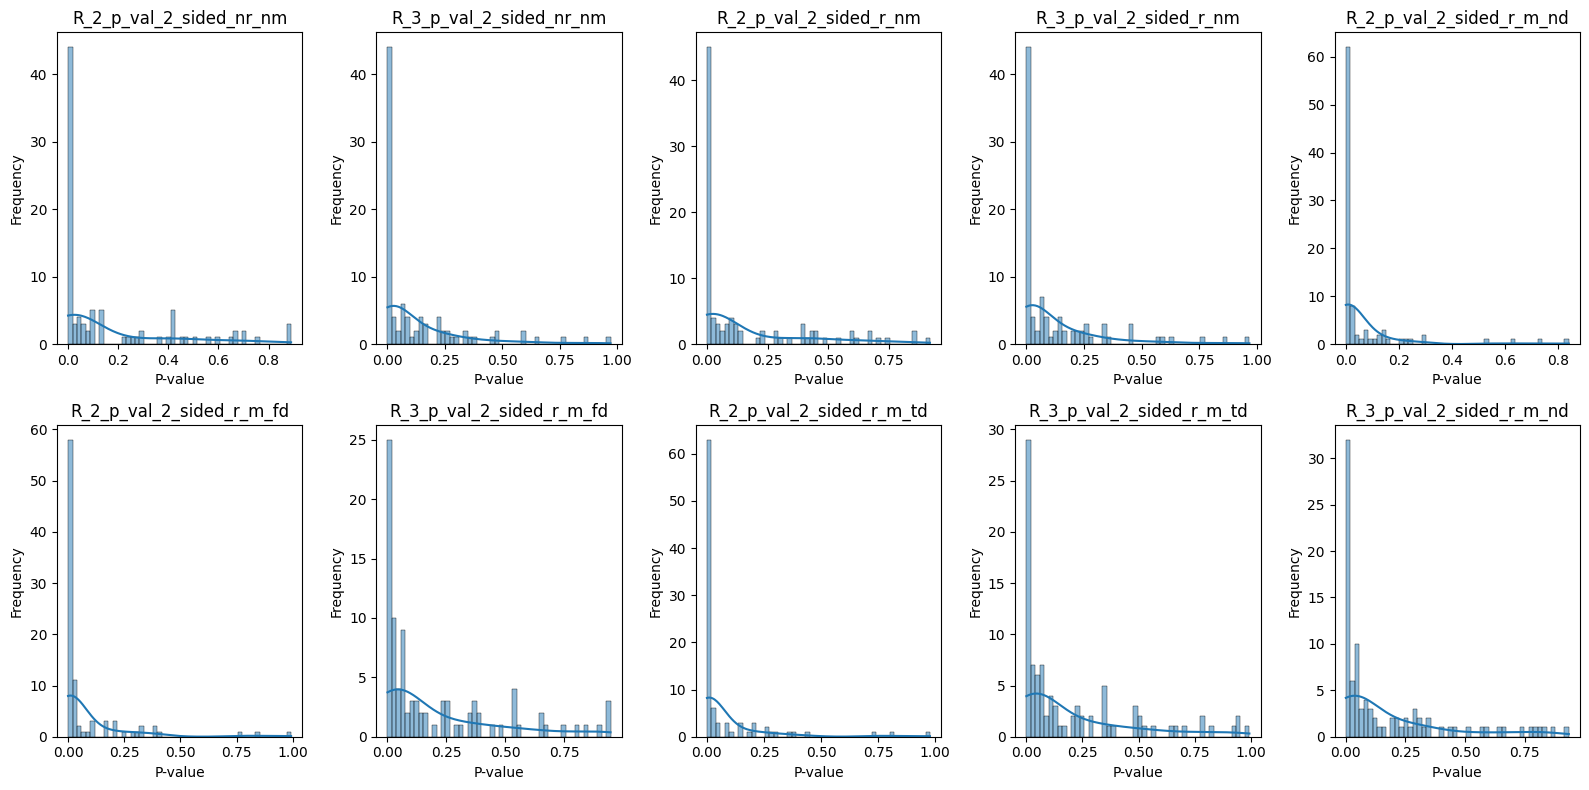

In [25]:
# Make a histogram grid of all 2 sided p_values
# the columns are R_2_p_val_2_sided_nr_nm, R_3_p_val_2_sided_nr_nm, R_2_p_val_2_sided_r_nm, R_3_p_val_2_sided_r_nm, R_2_p_val_2_sided_r_m_fd, R_3_p_val_2_sided_r_m_fd, R_2_p_val_2_sided_r_m_td, R_3_p_val_2_sided_r_m_td
n_bins = 50
fig, ax = plt.subplots(2, 5, figsize=(16, 8))
sns.histplot(test_results_df['R_2_p_val_2_sided_nr_nm'], kde=True, ax=ax[0, 0], bins=n_bins)
ax[0, 0].set_title('R_2_p_val_2_sided_nr_nm')
ax[0, 0].set_xlabel('P-value')
ax[0, 0].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_nr_nm'], kde=True, ax=ax[0, 1], bins=n_bins)
ax[0, 1].set_title('R_3_p_val_2_sided_nr_nm')
ax[0, 1].set_xlabel('P-value')
ax[0, 1].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_nm'], kde=True, ax=ax[0, 2], bins=n_bins)
ax[0, 2].set_title('R_2_p_val_2_sided_r_nm')
ax[0, 2].set_xlabel('P-value')
ax[0, 2].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_nm'], kde=True, ax=ax[0, 3], bins=n_bins)
ax[0, 3].set_title('R_3_p_val_2_sided_r_nm')
ax[0, 3].set_xlabel('P-value')
ax[0, 3].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_m_nd'], kde=True, ax=ax[0, 4], bins=n_bins)
ax[0, 4].set_title('R_2_p_val_2_sided_r_m_nd')
ax[0, 4].set_xlabel('P-value')
ax[0, 4].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_m_fd'], kde=True, ax=ax[1, 0], bins=n_bins)
ax[1, 0].set_title('R_2_p_val_2_sided_r_m_fd')
ax[1, 0].set_xlabel('P-value')
ax[1, 0].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_m_fd'], kde=True, ax=ax[1, 1], bins=n_bins)
ax[1, 1].set_title('R_3_p_val_2_sided_r_m_fd')
ax[1, 1].set_xlabel('P-value')
ax[1, 1].set_ylabel('Frequency')
sns.histplot(test_results_df['R_2_p_val_2_sided_r_m_td'], kde=True, ax=ax[1, 2], bins=n_bins)
ax[1, 2].set_title('R_2_p_val_2_sided_r_m_td')
ax[1, 2].set_xlabel('P-value')
ax[1, 2].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_m_td'], kde=True, ax=ax[1, 3], bins=n_bins)
ax[1, 3].set_title('R_3_p_val_2_sided_r_m_td')
ax[1, 3].set_xlabel('P-value')
ax[1, 3].set_ylabel('Frequency')
sns.histplot(test_results_df['R_3_p_val_2_sided_r_m_nd'], kde=True, ax=ax[1, 4], bins=n_bins)
ax[1, 4].set_title('R_3_p_val_2_sided_r_m_nd')
ax[1, 4].set_xlabel('P-value')
ax[1, 4].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [26]:
# lower sided p-value columns
lower_sided_columns = [col for col in test_results_df.columns if 'lo' in col]
# upper sided p-value columns
upper_sided_columns = [col for col in test_results_df.columns if 'hi' in col]

# for each column, calculate the share of significant results at different significance levels
significance_levels = [0.001, 0.01, 0.05, 0.10, 0.25]
significance_results = {}
for column in lower_sided_columns:
    significance_results[column] = {}
    for significance_level in significance_levels:
        significance_results[column][significance_level] = (test_results_df[column] < significance_level).mean()
significance_results_lo_df = pd.DataFrame(significance_results)

In [27]:
significance_results_lo_df

,R_2_p_val_lo_nr_nm,R_3_p_val_lo_nr_nm,R_2_p_val_lo_r_nm,R_3_p_val_lo_r_nm,R_2_p_val_lo_r_m_fd,R_3_p_val_lo_r_m_fd,R_2_p_val_lo_r_m_td,R_3_p_val_lo_r_m_td,R_2_p_val_lo_r_m_nd,R_3_p_val_lo_r_m_nd
0.001,0.311828,0.301075,0.301075,0.301075,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.010,0.473118,0.473118,0.483871,0.473118,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.050,0.634409,0.655914,0.634409,0.655914,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.100,0.709677,0.752688,0.709677,0.752688,0.000000,0.010753,0.000000,0.000000,0.0,0.000000
0.250,0.870968,0.935484,0.881720,0.935484,0.010753,0.021505,0.010753,0.021505,0.0,0.010753


In [28]:
lower_sided_columns = [col for col in test_results_df.columns if '2_sided' in col]

# for each column, calculate the share of significant results at different significance levels
significance_levels = [0.001, 0.01, 0.05, 0.10, 0.25]
significance_results = {}
for column in lower_sided_columns:
    significance_results[column] = {}
    for significance_level in significance_levels:
        significance_results[column][significance_level] = (test_results_df[column] < significance_level).mean()
significance_results_two_sided_df = pd.DataFrame(significance_results)

In [29]:
significance_results_two_sided_df

,R_2_p_val_2_sided_nr_nm,R_3_p_val_2_sided_nr_nm,R_2_p_val_2_sided_r_nm,R_3_p_val_2_sided_r_nm,R_2_p_val_2_sided_r_m_fd,R_3_p_val_2_sided_r_m_fd,R_2_p_val_2_sided_r_m_td,R_3_p_val_2_sided_r_m_td,R_2_p_val_2_sided_r_m_nd,R_3_p_val_2_sided_r_m_nd
0.001,0.279570,0.258065,0.290323,0.268817,0.376344,0.129032,0.376344,0.150538,0.408602,0.150538
0.010,0.397849,0.387097,0.397849,0.387097,0.569892,0.258065,0.602151,0.268817,0.645161,0.268817
0.050,0.548387,0.516129,0.548387,0.516129,0.763441,0.408602,0.763441,0.419355,0.774194,0.505376
0.100,0.634409,0.655914,0.634409,0.655914,0.784946,0.559140,0.806452,0.548387,0.827957,0.612903
0.250,0.731183,0.817204,0.741935,0.817204,0.892473,0.688172,0.892473,0.720430,0.935484,0.741935


In [30]:
# All R_2 and R_3 statistics
all_R2_stats = test_results_df['R_2_stat_nr_nm']
all_R3_stats = test_results_df['R_3_stat_nr_nm']
# get some empirical distribution of the R_2 and R_3 statistics for a fixed sample size
# random pareto samples
sample_size = 100
data = np.random.pareto(2, size=(sample_size, 10000))
dist_R_2 = R_stat_pareto_test(
    data,
    order=2,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised_condensed'
)[4]
dist_R_3 = R_stat_pareto_test(
    data,
    order=3,
    n_samples_empirical_distribution=10000,
    round_decimals_non_log=1,
    measurement_error='empirical_relative_normalised_condensed'
)[4]

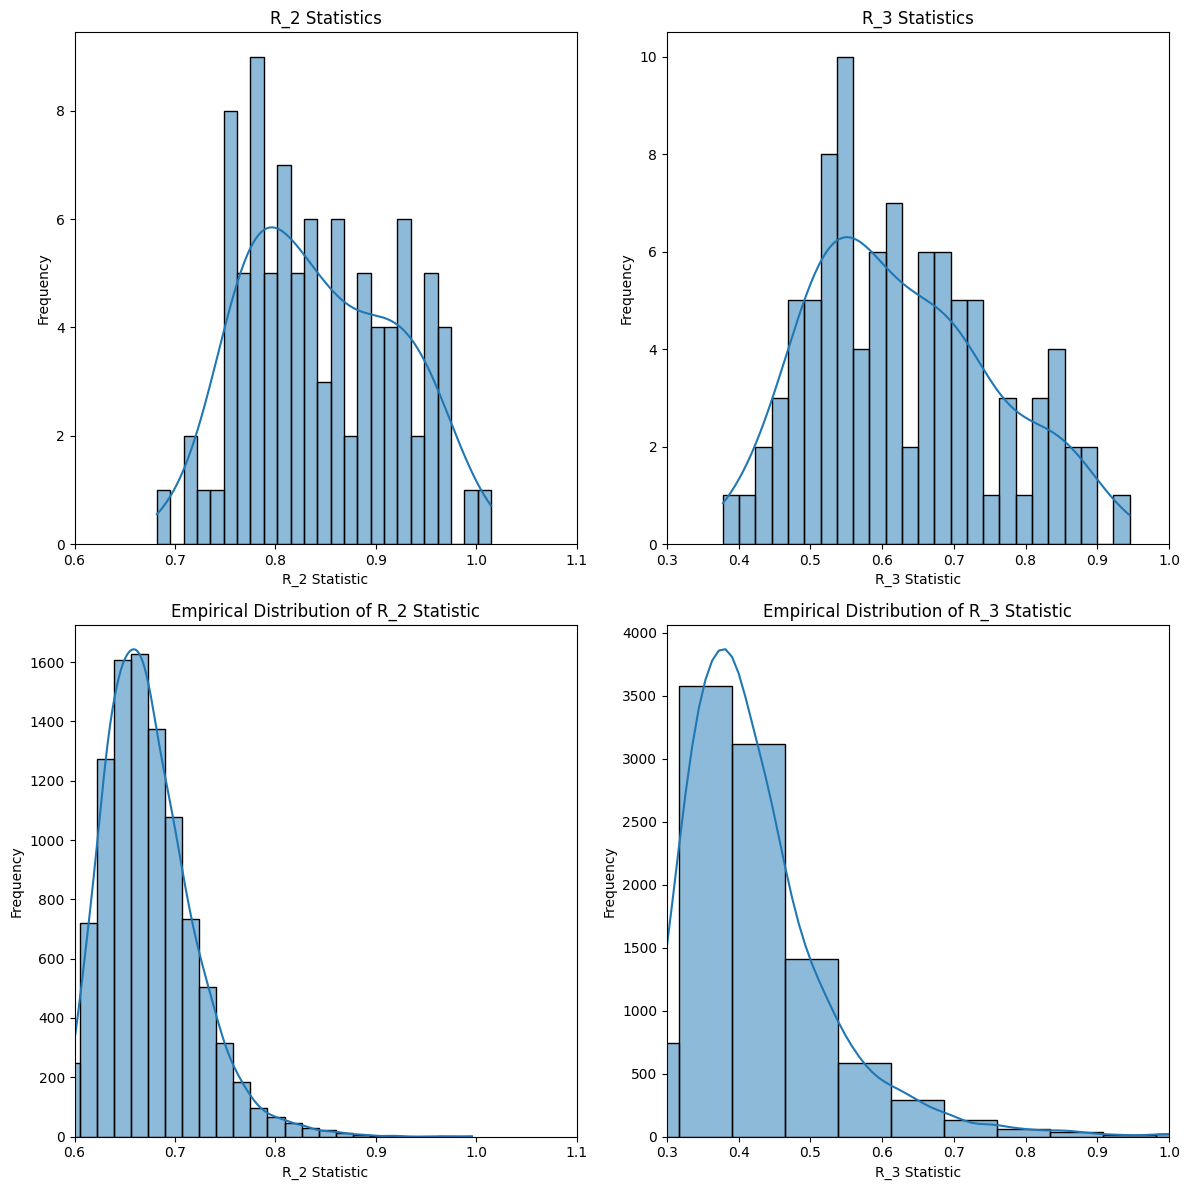

In [31]:
# In a 2x2 grid, plot the histograms of the R_2 and R_3 statistics and the empirical distributions
# Make sure the range of the x-axis is the same for all plots
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
n_bins = 25
sns.histplot(all_R2_stats, kde=True, ax=ax[0, 0], bins=n_bins)
ax[0, 0].set_title('R_2 Statistics')
ax[0, 0].set_xlabel('R_2 Statistic')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_xlim([0.6, 1.1])
sns.histplot(all_R3_stats, kde=True, ax=ax[0, 1], bins=n_bins)
ax[0, 1].set_title('R_3 Statistics')
ax[0, 1].set_xlabel('R_3 Statistic')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_xlim([0.3, 1.0])
sns.histplot(dist_R_2, kde=True, ax=ax[1, 0], bins=n_bins)
ax[1, 0].set_title('Empirical Distribution of R_2 Statistic')
ax[1, 0].set_xlabel('R_2 Statistic')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_xlim([0.6, 1.1])
sns.histplot(dist_R_3, kde=True, ax=ax[1, 1], bins=n_bins)
ax[1, 1].set_title('Empirical Distribution of R_3 Statistic')
ax[1, 1].set_xlabel('R_3 Statistic')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_xlim([0.3, 1.0])
plt.tight_layout()
plt.show()


## Conclusions

In general, it seems like we can reject Paretianity, but not in the way Teulings and Toussaint (2024) do:
* It is expected that the R_stat is below 1 when we introduce measurement error
* No noticeable effect of rounding errors
* In general, the R_statistics seem *too high* for an H_0 of Paretianity